In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
heart = pd.read_csv("heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
heart.shape

(303, 14)

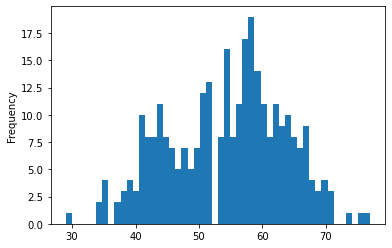

In [3]:
heart['age'].plot.hist(bins=50);

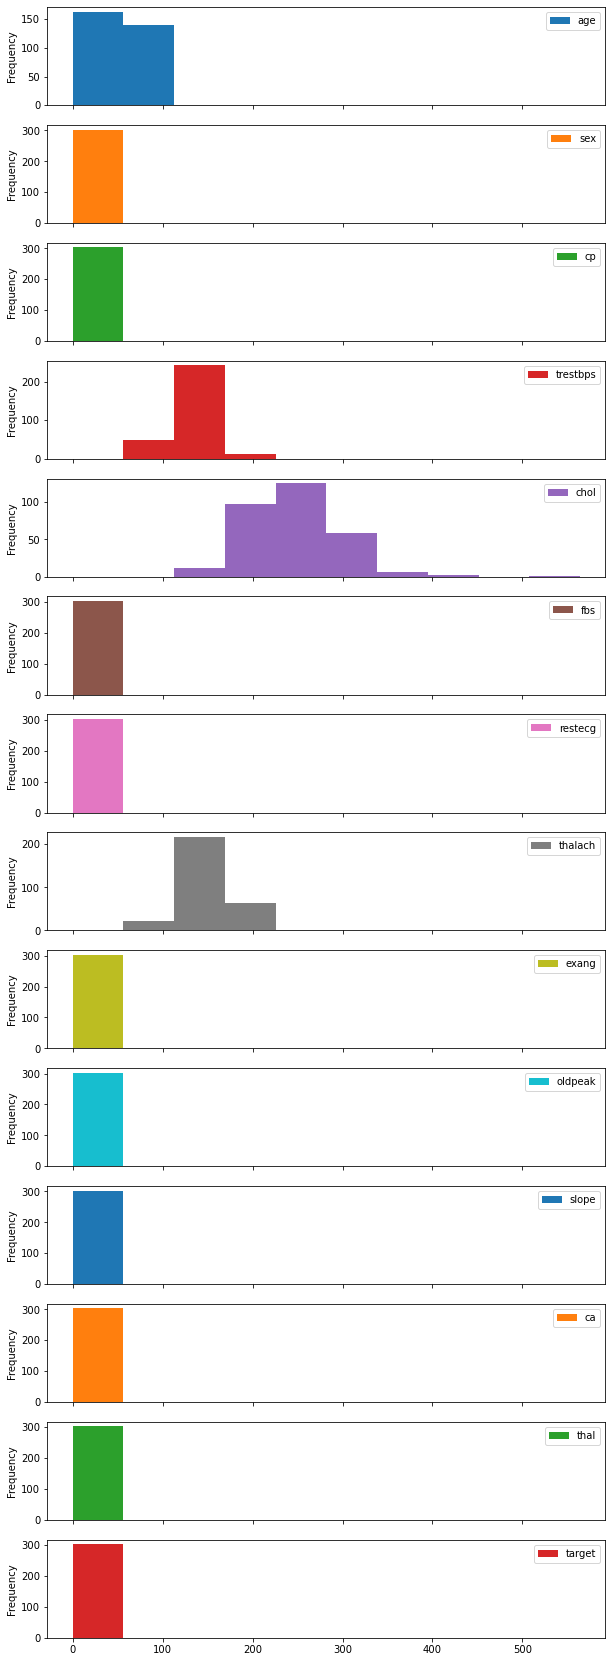

In [4]:
heart.plot.hist(subplots=True,figsize=(10,30) );


In [5]:
over50= heart[heart["age"]>50]
over50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


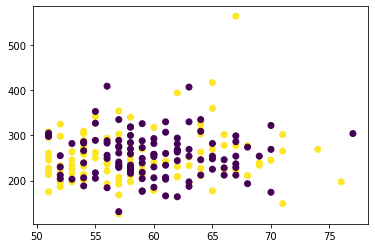

In [6]:
fig,axes = plt.subplots()
axes=axes.scatter(x=over50["age"],
                  y=over50["chol"],
                  c=over50["target"]
                  )

# setting up a classifier model

In [7]:
x= heart.drop("target",axis=1)
y= heart["target"]

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.1)

model= RandomForestClassifier()

model.fit(x_train,y_train)





RandomForestClassifier()


evaluating score

In [9]:
model.score(x_test,y_test)

0.8064516129032258

In [21]:
from sklearn.model_selection import cross_val_score

avg_score=np.mean(cross_val_score(model,x,y,cv=5))
avg_score

0.8215846994535518

In [23]:
from sklearn.metrics import confusion_matrix
y_preds= model.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[10,  4],
       [ 2, 15]], dtype=int64)

In [26]:
pd.crosstab(y_test,y_preds,
           rownames=["actual"],
           colnames=["predicted"])

predicted,0,1
actual,,
0,10,4
1,2,15


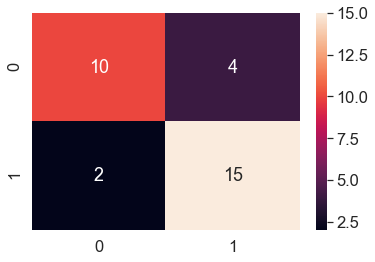

In [29]:
import seaborn as sns
sns.set(font_scale=1.5)

conf_mat=confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat,annot=True);


# its shows that our model has an accuracy of 82% to predict if someone has heart disease or not